In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


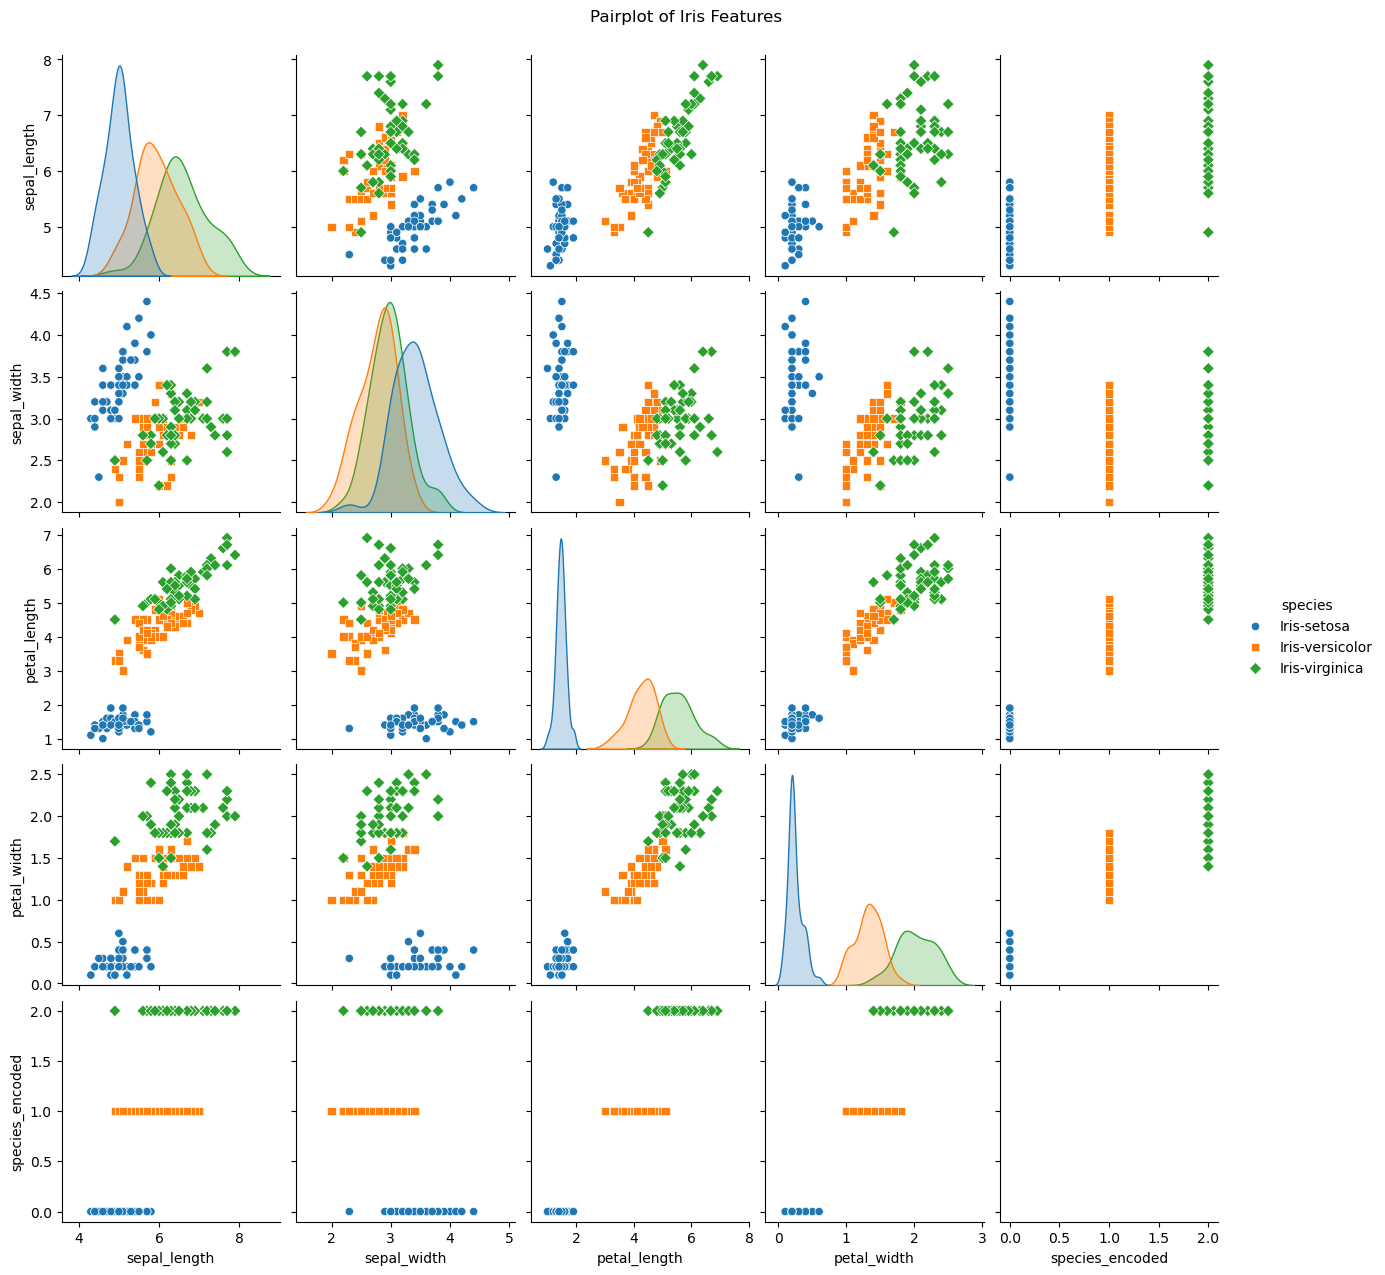

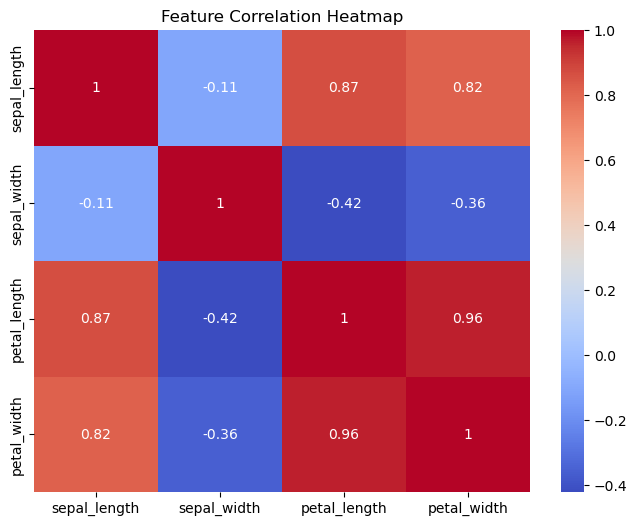

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



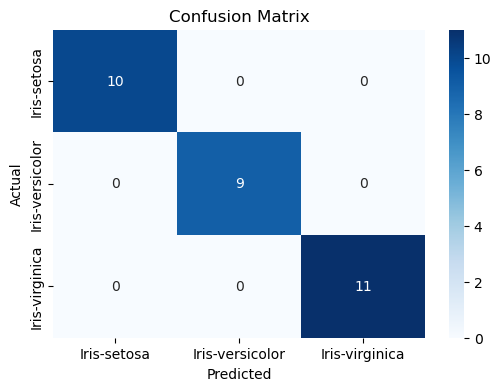

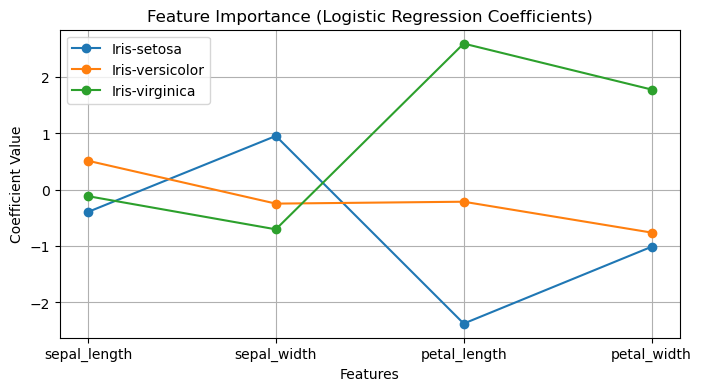

In [1]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Step 1: Load Data from ZIP ===
zip_path = "archive (2).zip"  # Make sure the zip file is in the same folder

with zipfile.ZipFile(zip_path) as z:
    with z.open("IRIS.csv") as f:
        df = pd.read_csv(f)

# === Step 2: Encode target column ===
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# === Step 3: Visualize the dataset ===

# Pairplot to show relationship between features
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Heatmap to show correlation between features
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['species', 'species_encoded']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# === Step 4: Prepare data for modeling ===
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Step 5: Train Logistic Regression Model ===
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# === Step 6: Evaluate Model ===
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# === Step 7: Confusion Matrix Visualization ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === Step 8: Feature Importance (Model Coefficients) ===
plt.figure(figsize=(8, 4))
coefficients = model.coef_
for i, class_label in enumerate(le.classes_):
    plt.plot(X.columns, coefficients[i], marker='o', label=class_label)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()